The code in this notebok reproduces the figures in **Examining the Evolution of Legal Precedent through Citation Network Analysis**. 

The code that produces the results can be found at https://github.com/idc9/law-net. 

The very last cell contains code to test pairwise comparisions between two metrics.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
from scipy.stats import linregress
from scipy.stats import ttest_rel

repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'
data_dir = '/Users/iaincarmichael/data/courtlistener/'
network_name = 'scotus'
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'
results_dir = subnet_dir + 'results/'

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
name = '1_16_17'
sort_path = results_dir + 'sort/%s/rankloss_sort.p' % name
rankloss_sort = pd.read_pickle(open(sort_path, "rb"))

rankloss = {'sort': rankloss_sort,
             'match': rankloss_match}#,

In [201]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

/Users/iaincarmichael/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  if __name__ == '__main__':


In [10]:
exper = 'sort'
metric = 'MRS'

# Helper functions

In [125]:
def plot_scores(results, exper='', metric='', network_name=''):
    """
    plots the results
    """
    # compute mean and std of data
    data = pd.DataFrame(index=results.columns, columns=['score', 'error'])
    data['score'] = results.median(axis=0)
    data.sort_values(by='score', inplace=True)

    # label locations
    pos = np.arange(data.shape[0])

    plt.barh(pos,
             data['score'],
             color='grey')

    plt.xlim([0, 1.2 * data['score'].max()])

    axis_font = {'fontname': 'Arial', 'size': '12'}
    plt.yticks(pos, data.index, **axis_font)
    plt.xlabel('mean rank score')
    
    plt.gca().spines.values()[1].set_visible(False)
    plt.gca().spines.values()[3].set_visible(False)

# Sort Experiment Results

## Figure E: compare in-degree driven metrics

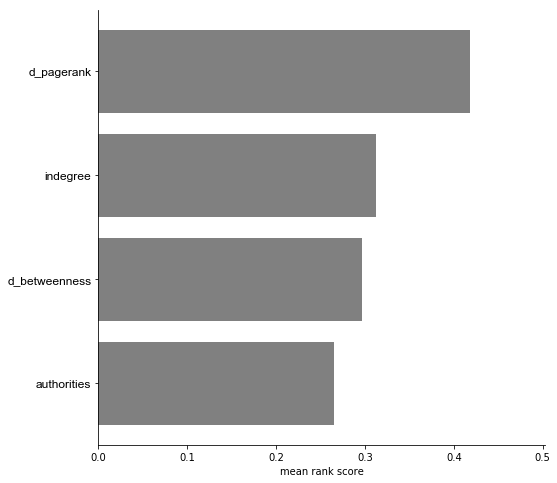

In [126]:
metrics_to_show = ['indegree', 'd_pagerank', 'authorities', 'd_betweenness']

plt.figure(figsize=[8, 8])
plot_scores(rankloss[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

## Figure F: include out-degree

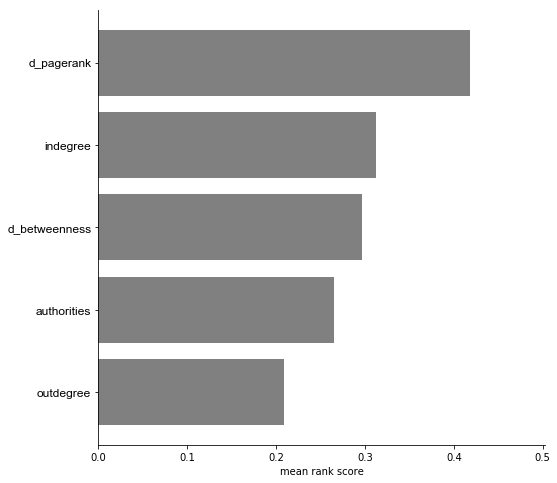

In [53]:
metrics_to_show = ['indegree', 'd_pagerank', 'authorities', 'd_betweenness', 'outdegree']

plt.figure(figsize=[8, 8])
plot_scores(rankloss[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

## figure H: num words vs. out-degree

In [57]:
num_words = np.array(G.vs['num_words'])
outdegrees = np.array(G.outdegree())
indegrees = G.indegree()
years = G.vs['year']

In [89]:
# remove some outliers
out_deg_upper = np.percentile(outdegrees, 99)
out_deg_lower = np.percentile(outdegrees, 0)

num_words_upper = np.percentile(num_words, 99)
num_words_lower = np.percentile(num_words, 0)

od_to_keep = (out_deg_lower <= outdegrees) & (outdegrees <= out_deg_upper)
nw_to_keep = (num_words_lower <= num_words) & (num_words <= num_words_upper)
to_keep =  od_to_keep & nw_to_keep

nw = num_words[to_keep]
od = outdegrees[to_keep]

In [90]:
# remove cases that have zero out-degree
slope, intercept, r_value, p_value, std_err =  linregress(nw, od)

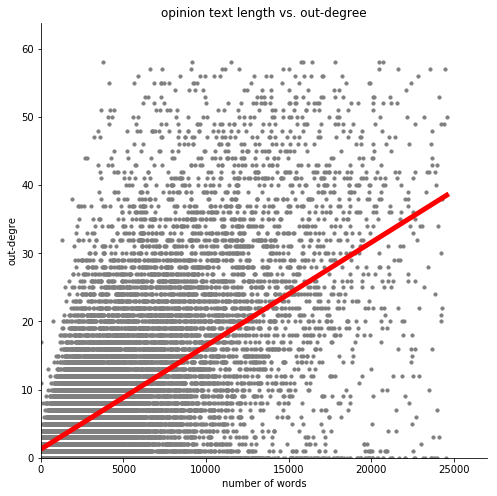

In [123]:
plt.figure(figsize=[8, 8])
plt.scatter(nw, od, color='grey', s=10)
plt.xlabel('number of words')
plt.ylabel('out-degre')

# kill top and right axes
plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)

plt.xlim([0, max(nw)*1.1])
plt.ylim([0, max(od)*1.1])

xvals = np.array([0, max(nw)])
line = slope * xvals + intercept
plt.plot(xvals, line, color='red', linewidth=5.0)
plt.title('opinion text length vs. out-degree')

# Figure I

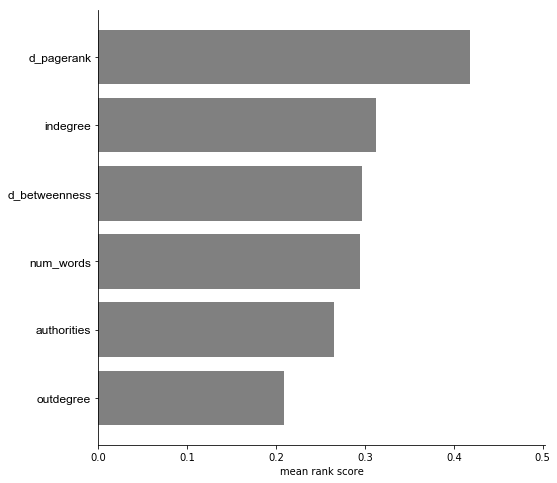

In [127]:
metrics_to_show = ['indegree', 'd_pagerank', 'authorities', 'd_betweenness', 'outdegree', 'num_words']

plt.figure(figsize=[8, 8])
plot_scores(rankloss[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

# Figure J: citation ages

In [128]:
diffs = [G.vs[e[0]]['year'] - G.vs[e[1]]['year'] for e in G.get_edgelist()]

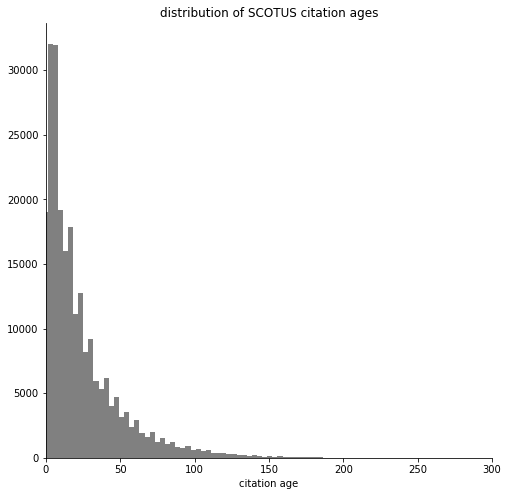

In [131]:
plt.figure(figsize=[8, 8])
bins = np.linspace(-40, 300, 100)
plt.hist(diffs, bins=bins, color='grey')
plt.xlim(0, 300)
plt.xlabel('citation age')

plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)

plt.title('distribution of SCOTUS citation ages')

# Figure K: time aware

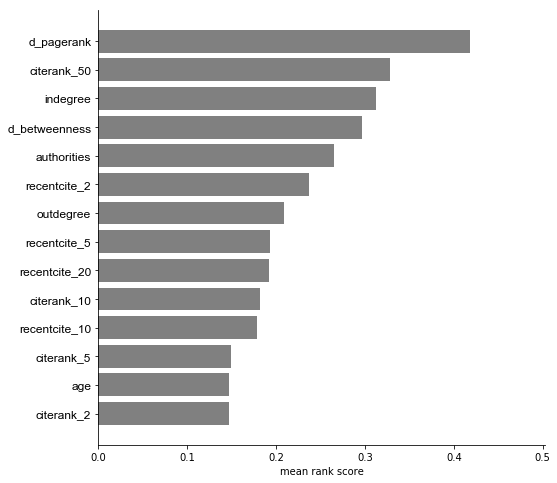

In [133]:
metrics_to_show = [ 'd_pagerank','citerank_50', 
                             'indegree',  'd_betweenness',
                             'authorities', 'recentcite_2',
                             'outdegree', 'recentcite_5',
                             'recentcite_20', 'citerank_10',
                             'recentcite_10', 'citerank_5',
                             'age', 'citerank_2']

plt.figure(figsize=[8, 8])
plot_scores(rankloss[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

# Figure L: Federal

In [140]:
rankloss_sort_federal = pd.read_pickle('/Users/iaincarmichael/data/courtlistener/federal/results/sort/federal_test/rankloss_sort.p')

rankloss_federal = {'sort': rankloss_sort_federal}

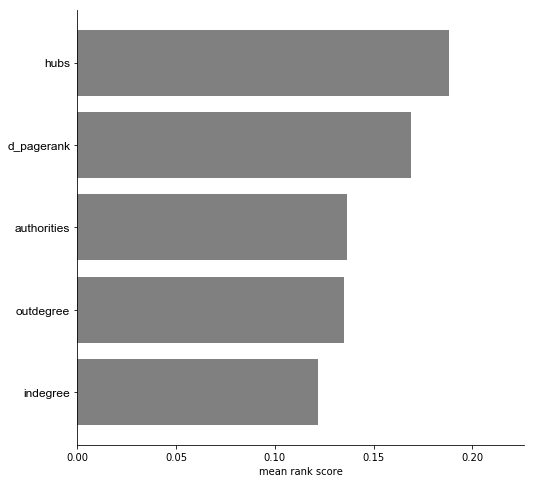

In [141]:
metrics_to_show = ['hubs', 'd_pagerank', 'authorities', 'outdegree', 'indegree']

plt.figure(figsize=[8, 8])
plot_scores(rankloss_federal[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

# Figure M: warren court

In [142]:
def get_year_aggregate(years, x, fcn):
    by_year = {y: [] for y in set(years)}
    for i in range(len(years)):
        by_year[years[i]].append(x[i])
    
    year_agg_dict = {y: fcn(by_year[y]) for y in by_year.keys()}
    return pd.Series(year_agg_dict)

in_year_median = get_year_aggregate(years, indegrees, np.median)

nw_year_median = get_year_aggregate(years, num_words, np.median)

od_year_median = get_year_aggregate(years, outdegrees, np.median)

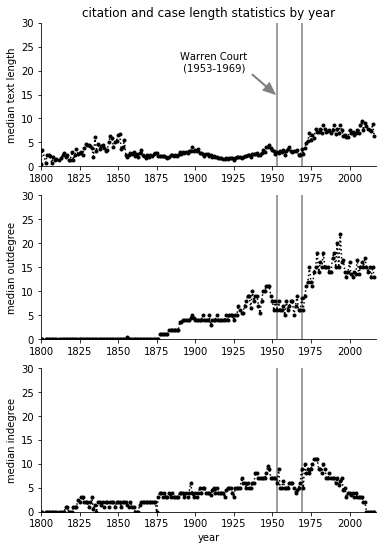

In [182]:
# Text length
plt.figure(figsize=[6, 9])
plt.subplot(3,1,1)
plt.plot(nw_year_median.index, nw_year_median/1000,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median text length')
plt.xlim([1800, 2017])
plt.ylim([0, 30])
plt.title('citation and case length statistics by year')
plt.annotate('Warren Court \n (1953-1969)', xy=(1952, 15), xytext=(1890, 20),
            arrowprops=dict(fc='grey', ec='grey', shrink=0.01, width=1, headwidth=10))
plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)

# out degree
plt.subplot(3,1,2)
plt.plot(od_year_median.index, od_year_median,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median outdegree')
plt.xlim([1800, 2017])
plt.ylim([0, 30])
plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)

# in degree
plt.subplot(3,1,3)
plt.plot(in_year_median.index, in_year_median,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median indegree')
plt.xlabel('year')
plt.xlim([1800, 2017])
plt.ylim([0, 30])
plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)

# Figure O: page rank bias

In [187]:
years = np.array(G.vs['year'])
pr = np.array(G.pagerank())


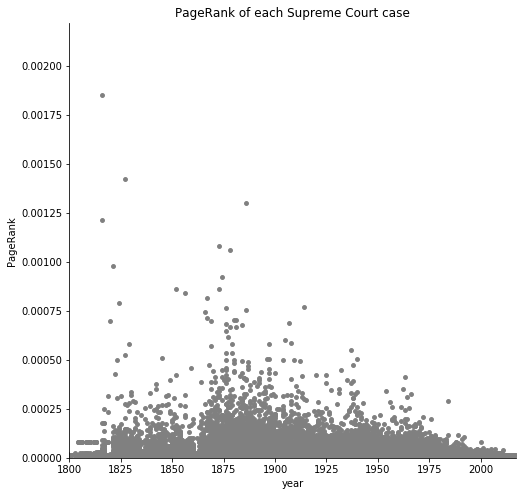

In [197]:
plt.figure(figsize=[8,  8])

plt.scatter(years, pr, color='grey', s=15)
plt.xlabel('year')
plt.ylabel('PageRank')
plt.xlim([1800, 2017])
plt.ylim([0, 1.2 *max(pr)])
plt.title('PageRank of each Supreme Court case')


plt.gca().spines.values()[1].set_visible(False)
plt.gca().spines.values()[3].set_visible(False)



# Figure P

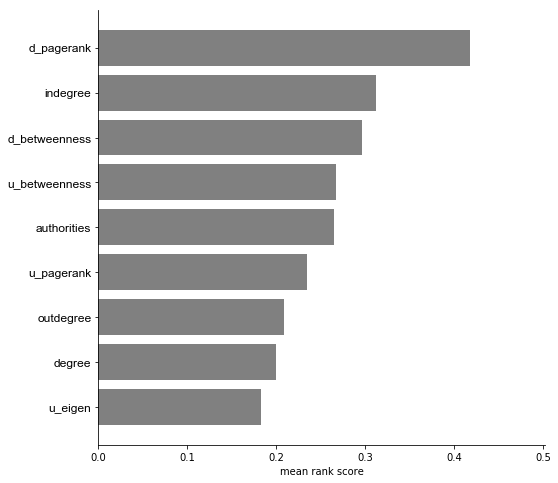

In [196]:
metrics_to_show = ['d_pagerank', 'indegree', 'd_betweenness', 'u_betweenness', 
                  'authorities', 'u_pagerank', 'outdegree', 'degree', 'u_eigen']

plt.figure(figsize=[8, 8])
plot_scores(rankloss[exper][metric][metrics_to_show], exper=exper, metric=metric, network_name=network_name)

# Statsitical significance

In [198]:
# to_compare = ['outdegree', 'hubs']
# to_compare = ['recentcite_10', 'citerank_2']
to_compare = ['num_words', 'indegree']
exper = 'sort'
metric = 'MRS'
data = rankloss[exper][metric][to_compare]

print '%s vs. %s' % ( to_compare[0], to_compare[1])
print '%s experiment, %s' % (exper,metric)
print 'two sided t-test for equal means' 
print
print 'dependent paired samples'
print ttest_rel(data[to_compare[0]], data[to_compare[1]])

num_words vs. indegree
sort experiment, MRS
two sided t-test for equal means

dependent paired samples


NameError: name 'ttest_rel' is not defined